## Convolutional Neural Networks

1. A bit of history
- 1950s hubel& wiesel : topographical mapping in the cortex(대뇌에 지형적 매핑)  
  -> neurons had a hierarchical(계층적) organization  
   -> hypercomplex cells are now responsive with an end point => corners
- 1980s neurocognitron  
    -> simple cells: modifiable parameters  
    -> complex cells: perform pooling
- 2012 alex krizhevsky  
    -> alexnet  
    -> image retrieval, self driving car, face recognition, pose recognition, image captioning

2. Convolutional neural networks   
1) fully connected layer  
1x3072 -> 3071 x 10 weights -> 1x 10 activation  

    2) convolution layer
    - fully connected layer와 가장 큰 차이는 preserve spatial structure
    - 5x5x3 가 weights 가 됨
    - 입력이미지의 depth와 filter의 depth가 같음, 이때는 3으로 같음
    - 이미지를 돌아다니면서 내적함
    - we take 5x5x3 stretch it out into 75 , long one vector
    => plopping our filter(5x5x3) on top of the spatial location in the image and multiplying all of the corresponding values together
    - start at the upper left-hand corner and basically center our filter on top of every pixel in this input volume
    - every position, we're going to do this dot product => produce one value
    - 돌아다니면서 훑으면 get activation filter : value of that filter at every spatial location
    - we can do this for as many filters as we want to have in this layer
    - 6개의 5x5 filter 하기로 했으면 28x28x6 의 activation maps get  
    - filter= receptive field 라고도 불림
    
   => basically just taking a filter, sliding it spatially over the image and computing the dot product  
   
    3) convnet 
    - sequence of convolution layers, interspersed(점철) with activation functions 활성함수(ReLU)
    - filters at the earlier layers usually represent low level features -> edges(가장자리)
    - mid layer: more complex kind of features -> corners(모서리), blobs(방울?)
    - high level features -> things that resemble concepts than blobs  => simple to more complex features
    - total convolutional neural network would look like ?
        1. have an input image 
        2. pass it through this sequence of layers (convolutional layer->nonlinear layer(relu)->pooling layer(downsample the size of our activation map) 반복) -> **at the end** fully connected layer

In [2]:
!pip install IPython
from IPython.display import Image

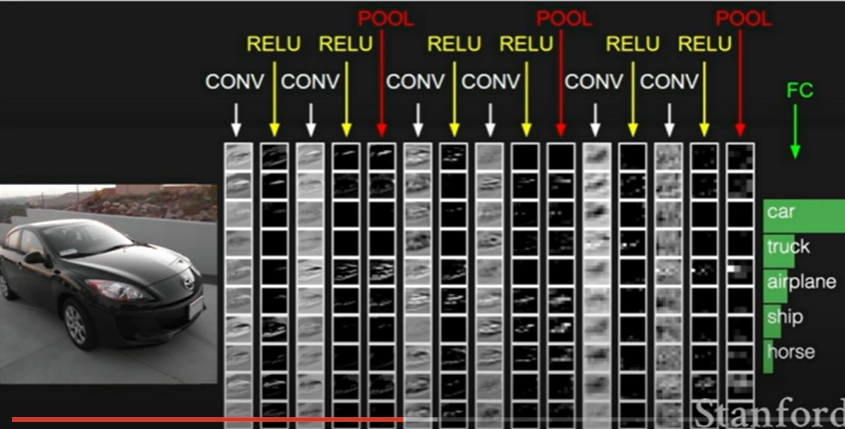

In [3]:
Image("C:\스크린샷(480).png")

4) how the spatial dimensions work out
 32x32x3 image 를 어떻게 28x28 activation map으로 얻어내는지 알아보자.
 - stride: interval at which i slide , 내 재량임
 - output size: $(n-f)/stride+1$ , n=image 가로세로 길이, f=filter 가로세로길이
 - why do we do zero padding : is to maintain the same input size as we had before
 - zero pad with (f-1)/2  
 ex) filter size가 3이면 zero pad with 1, filter size가 5면 zero pad with 2..

5) how the convolution operation works ?
- what we're going to get at this output is going to be this volume
- **the number of filters is the depth**

6) pooling layer **downsampling**
- downsamples, and it takes your input volume
- doesnt do anything in the depth 
- ex) 224x224x64 -> pool -> 112x112x64
- **max pooling** with filter size(going to be the region) instead of doing the dot product, we just take the maximum value
- why is max pooling better than average pooling ? <br>
each value is kind of how much this filter fired in this location, giving a signal of how much did this filter fire at any location in this image
- sice pooling and stride both have the same effect of downsampling why do we use pooling ? <br>
people have been using stride instead of pooling
- people don't usually use zero padding when pooling because we want to direct downsample
- **common settings:** filter size of 2x2 or 3x3
- pooling layer has no parameters -> because parameters are the weight that we're trying to learn 

7) at the end
1. we're going to have width, height, and depth 
2. we just take all of these and stretch and get 1D input
3. apply this fully connected layer on top
4. now we're going to have connections to every one of these convolutional map output
**before preserve spatial structure, at the end we want to aggregate all of this together**

## CNN Architecture
1. AlexNet(2012)
- first large scale convnet that was able to do well on the imagenet classification
- **conv1-maxpool1-norm1-conv2-maxpool2-norm2-conv3-conv4-conv5-maxpool3-fc6-fc6-fc7**
- 8layer
- first deep learning based approach first comNet that was used <br>
2. VGG(2014)
- small filters, deeper networks(total number of layers)
- 8layers (alexnet)- > 19layers
- only 3x3 conv stride 1, pad 1, and 2x2 max pool stride 2 
- **why use smaller filters? 더 작은 필터를 더 많이 쌓는게 사이즈가 더 큰 필터를 한번 쌓는것과 같은 효과가 남**
3. GoogleNet(2014)
- computational efficiency
- no fully connected layers
- 'inception module' 을 쌓아서 만들었다 
- **what is inception module ?** 
    1. they wanted to design a good local network typology(network within a network) and then stack these modules on top of each other <br>
    2. applying several different kinds of filter operations on the input from previous layer
    3. concatenate all filter outputs together depth-wise (so that this creates one tenser output at the end)
    4. what is the problem with this ? **computational complexity = too much operations**
    5. how do we deal with this ? bottleneck layers that use **1x1 convolutions** to reduce feature depth  <br>
- stem network(conv-pool-2x conv-pool) + stacked inception modules + classifier output

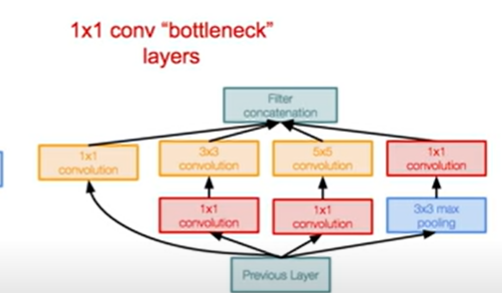

In [4]:
Image("C:\스크린샷(481).png")

4. ResNet(2015) **best performing model**
- very deep networks using residual connections
- 152 layer model
- what happens when we continue stacking deeper layers on a plain convolutional neural network?<br>
    train error 마저 좋게 안나옴 -> 과적합 문제만이 아님 -> optimization problem, deeper models are harder to optimize
- instead of just stacking, use network layers to fit a residual mapping instead of directly tring to fit a desired underlying mapping
- residual F(x) = H(x)-x